# Pre-Processing & Exploratory Data Analysis

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

Patient Features:
- id: Unique patient identifier (int)
- gender: Patient's gender (str)
  - 'Male': Male
  - 'Female': Female
  - 'Other': Other/Unspecified
- age: Patient's age in years (float)
- hypertension: Hypertension status (int)
  - 0: No hypertension
  - 1: Has hypertension
- heart_disease: Presence of heart disease (int)
  - 0: No heart disease
  - 1: Has heart disease
- ever_married: Marital status (str)
  - 'Yes': Ever married
  - 'No': Never married
- work_type: Type of work (str)
  - 'Private': Private sector employment
  - 'Self-employed': Self-employed
  - 'Govt_job': Government job
  - 'children': Under working age
  - 'Never_worked': Never employed
- Residence_type: Residence area type (str)
  - 'Urban': Urban area
  - 'Rural': Rural area
- avg_glucose_level: Average glucose level in blood (mg/dL) (float)
- bmi: Body Mass Index (kg/m²) (float)
- smoking_status: Smoking history (str)
  - 'formerly smoked': Previously smoked but quit
  - 'never smoked': No smoking history
  - 'smokes': Current smoker
  - 'Unknown': Smoking status not available

Target Variable:
- stroke: Stroke occurrence (int)
  - 0: No stroke occurred
  - 1: Stroke occurred

Notes:
1. Missing values may exist in the bmi column (shown as NaN)
2. Age includes fractional years for very young patients
3. The dataset is imbalanced with fewer stroke cases (class 1)
4. Some categorical features have 'Unknown' categories
"""

In [2]:
# Import the dataset
data = pd.read_csv("heart.csv")
df = data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
display(df.head())
display(df.tail())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [8]:
import pandas as pd

# Assuming df is your DataFrame
df = df.dropna(subset=['bmi'])

# Reset index after dropping rows (optional)
df = df.reset_index(drop=True)


In [9]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [10]:
# Define columns
'''
The variable "class_cols" contains a list of the categorical features.
The variable "continuous_cols" contains a list of the features with continuous values.
The variable "target_col" contains the stroke column.
'''

categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type",
                    "Residence_type", "smoking_status"]
continuous_cols = ["age", "avg_glucose_level", "bmi"]
target_col = ["stroke"]


**Data Preprocessing and Analysis Workflow**

In this workflow, we will follow a systematic approach to understand and prepare our dataset for modeling. The key steps involved are as follows:

1. **Exploratory Data Analysis (EDA)**:
   - Conduct comprehensive EDA to uncover insights about the data.
   - Generate various visualizations (e.g., histograms, box plots, scatter plots) to get a better understanding of feature distributions, relationships, and potential outliers.

2. **Train-Test Split**:
   - Split the dataset into **training** and **testing** sets to evaluate model performance.
   - This ensures that the model is trained on one portion of the data and validated on an unseen portion to avoid **data leakage**.

3. **Scaling Continuous Features**:
   - Apply `StandardScaler` to the continuous features to standardize their values.
   - This transformation will center the data around a mean of `0` and scale it to have a standard deviation of `1`.

By following these steps, we aim to prepare our dataset effectively for modeling, ensuring that we maximize the model's performance and reliability.


## Exploratory Data Analysis Graphs

### Correlation Matrix

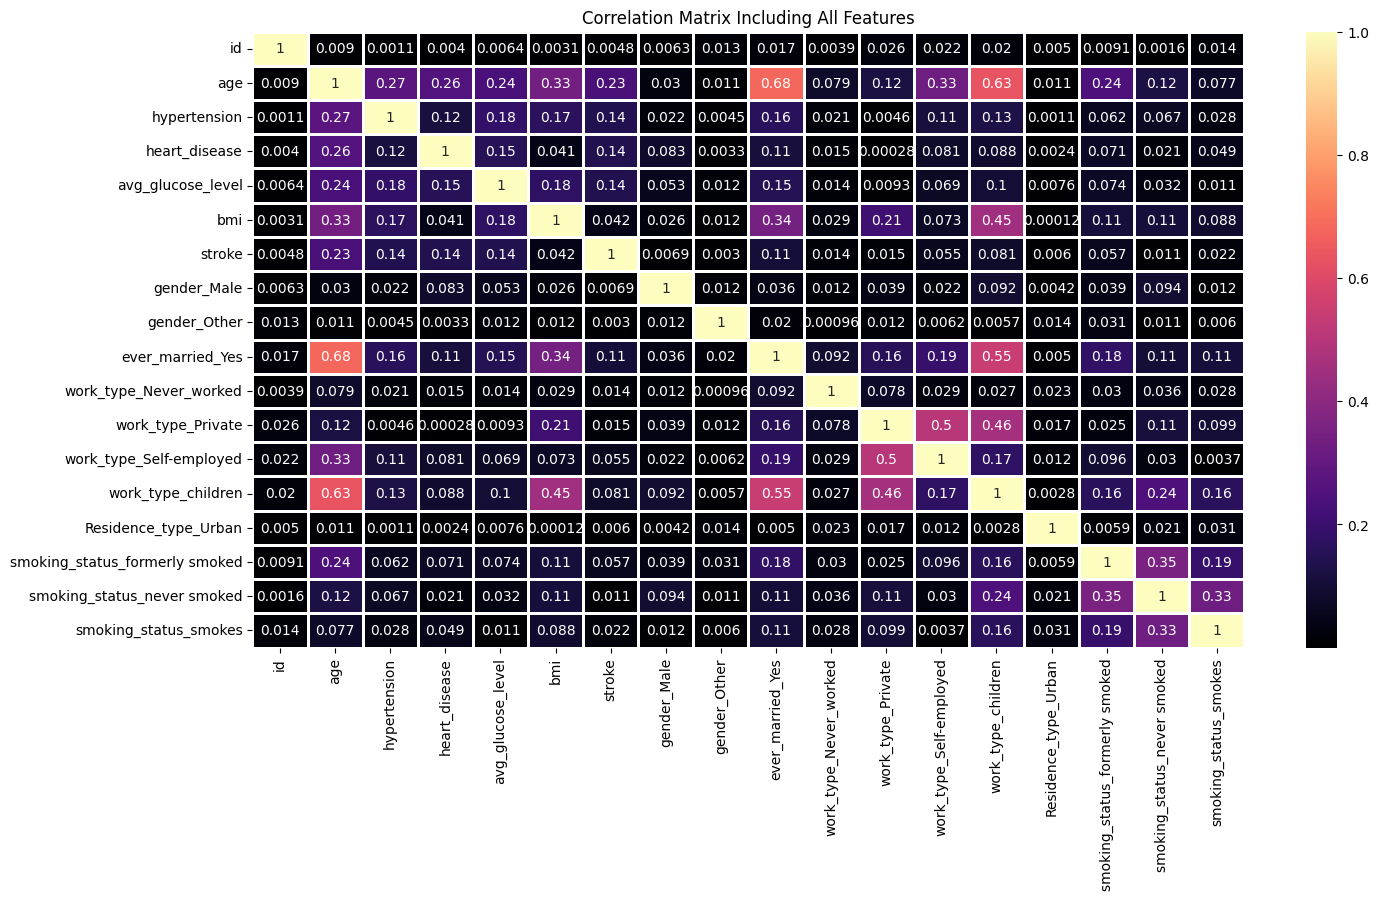

In [11]:
# Convert categorical variables to numeric using one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)

# Now compute correlation
correlation = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(abs(correlation), lw=1, annot=True, cmap='magma')
plt.title("Correlation Matrix Including All Features")
plt.show()



### Histplots for the Continuous Features

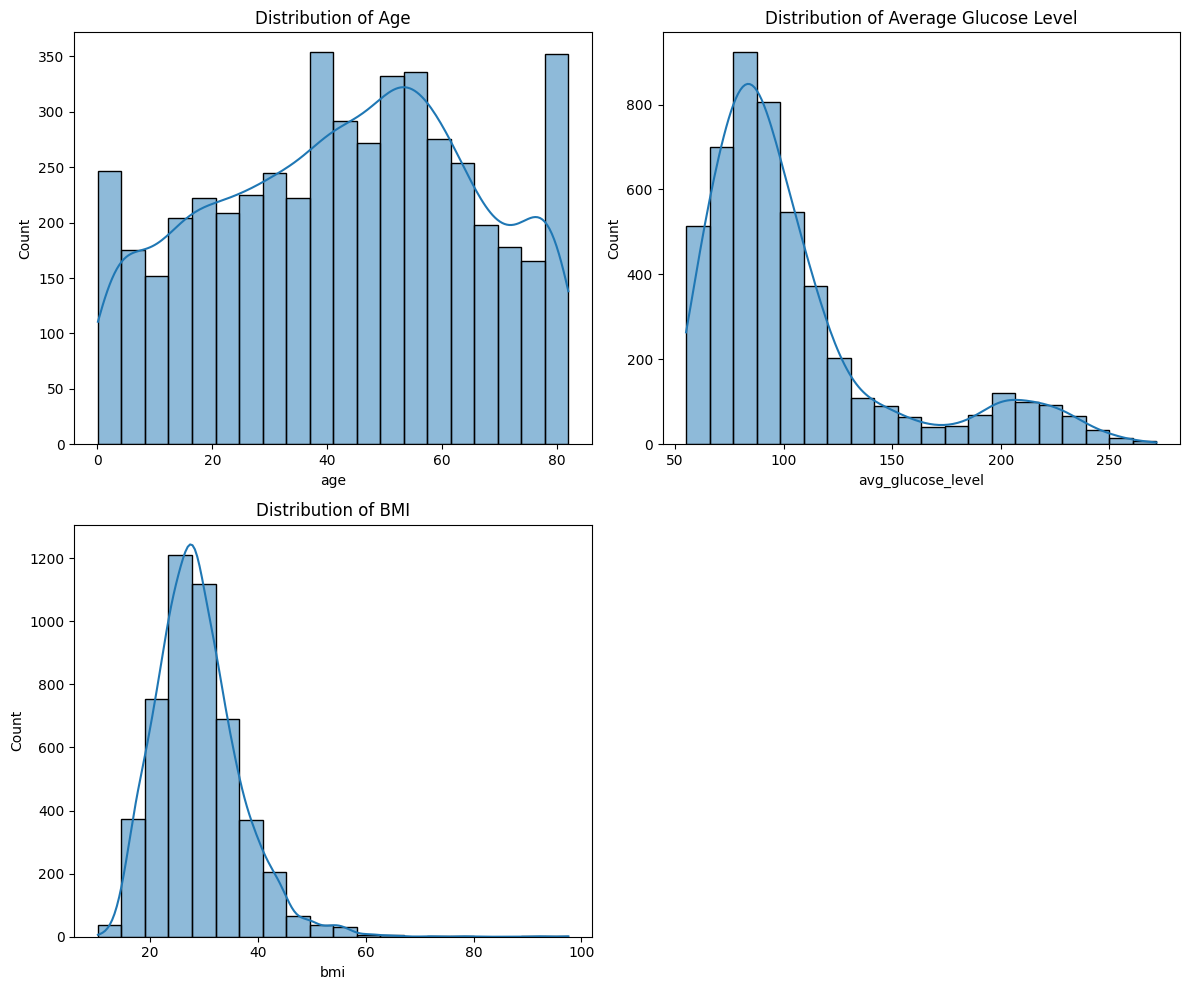

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histplots for the Continuous Features
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted grid to 2x2 for 4 features

# Plot distributions
sns.histplot(df['age'], bins=20, ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of Age')

sns.histplot(df['avg_glucose_level'], bins=20, ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of Average Glucose Level')

sns.histplot(df['bmi'], bins=20, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of BMI')

# Since we have only 3 continuous features, turn off the last subplot
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Distribution of the Continuous Features with respect to the Target Variable

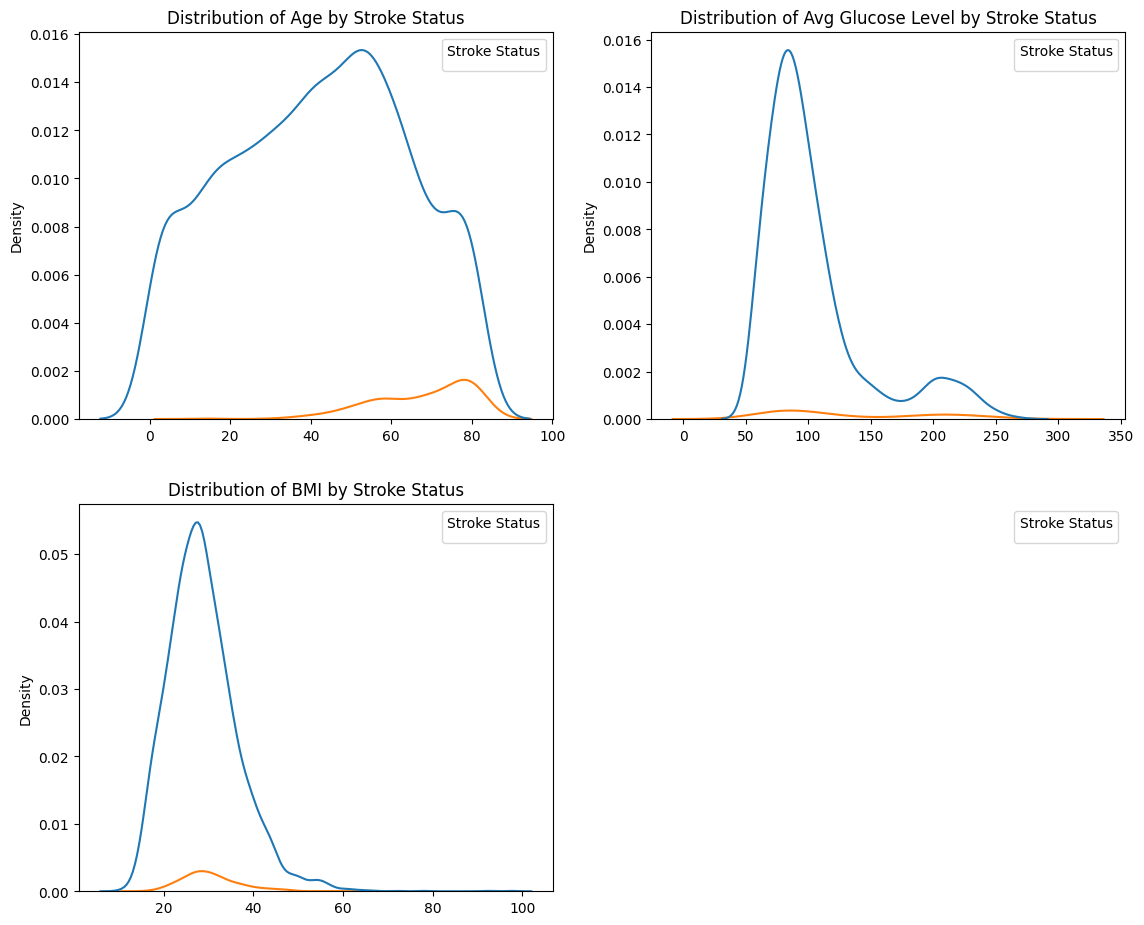

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with adjusted size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

# Plot for 'age'
axes[0, 0].set_title("Distribution of Age by Stroke Status")
sns.kdeplot(data=df, x='age', hue='stroke', ax=axes[0, 0], palette=['#1f77b4', '#ff7f0e'])

# Plot for 'avg_glucose_level'
axes[0, 1].set_title("Distribution of Avg Glucose Level by Stroke Status")
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', ax=axes[0, 1], palette=['#1f77b4', '#ff7f0e'])

# Plot for 'bmi'
axes[1, 0].set_title("Distribution of BMI by Stroke Status")
sns.kdeplot(data=df, x='bmi', hue='stroke', ax=axes[1, 0], palette=['#1f77b4', '#ff7f0e'])

# Since we only have 3 continuous features, turn off the last subplot
axes[1, 1].axis('off')

# Set labels and improve legend
for ax in axes.flat:
    if ax.get_visible():  # Only for visible plots
        ax.set_xlabel("")
        ax.set_ylabel("Density")
        # Improve legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['No Stroke', 'Stroke'], title='Stroke Status')

plt.show()

### Plot for Categorical Features with respect to the Target Variable

<ipython-input-14-9943c38374cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='pastel')
<ipython-input-14-9943c38374cd>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Female', 'Male'])
<ipython-input-14-9943c38374cd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, ax=axes[0, 1], palette='pastel')
<ipython-input-14-9943c38374cd>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['No', 'Yes

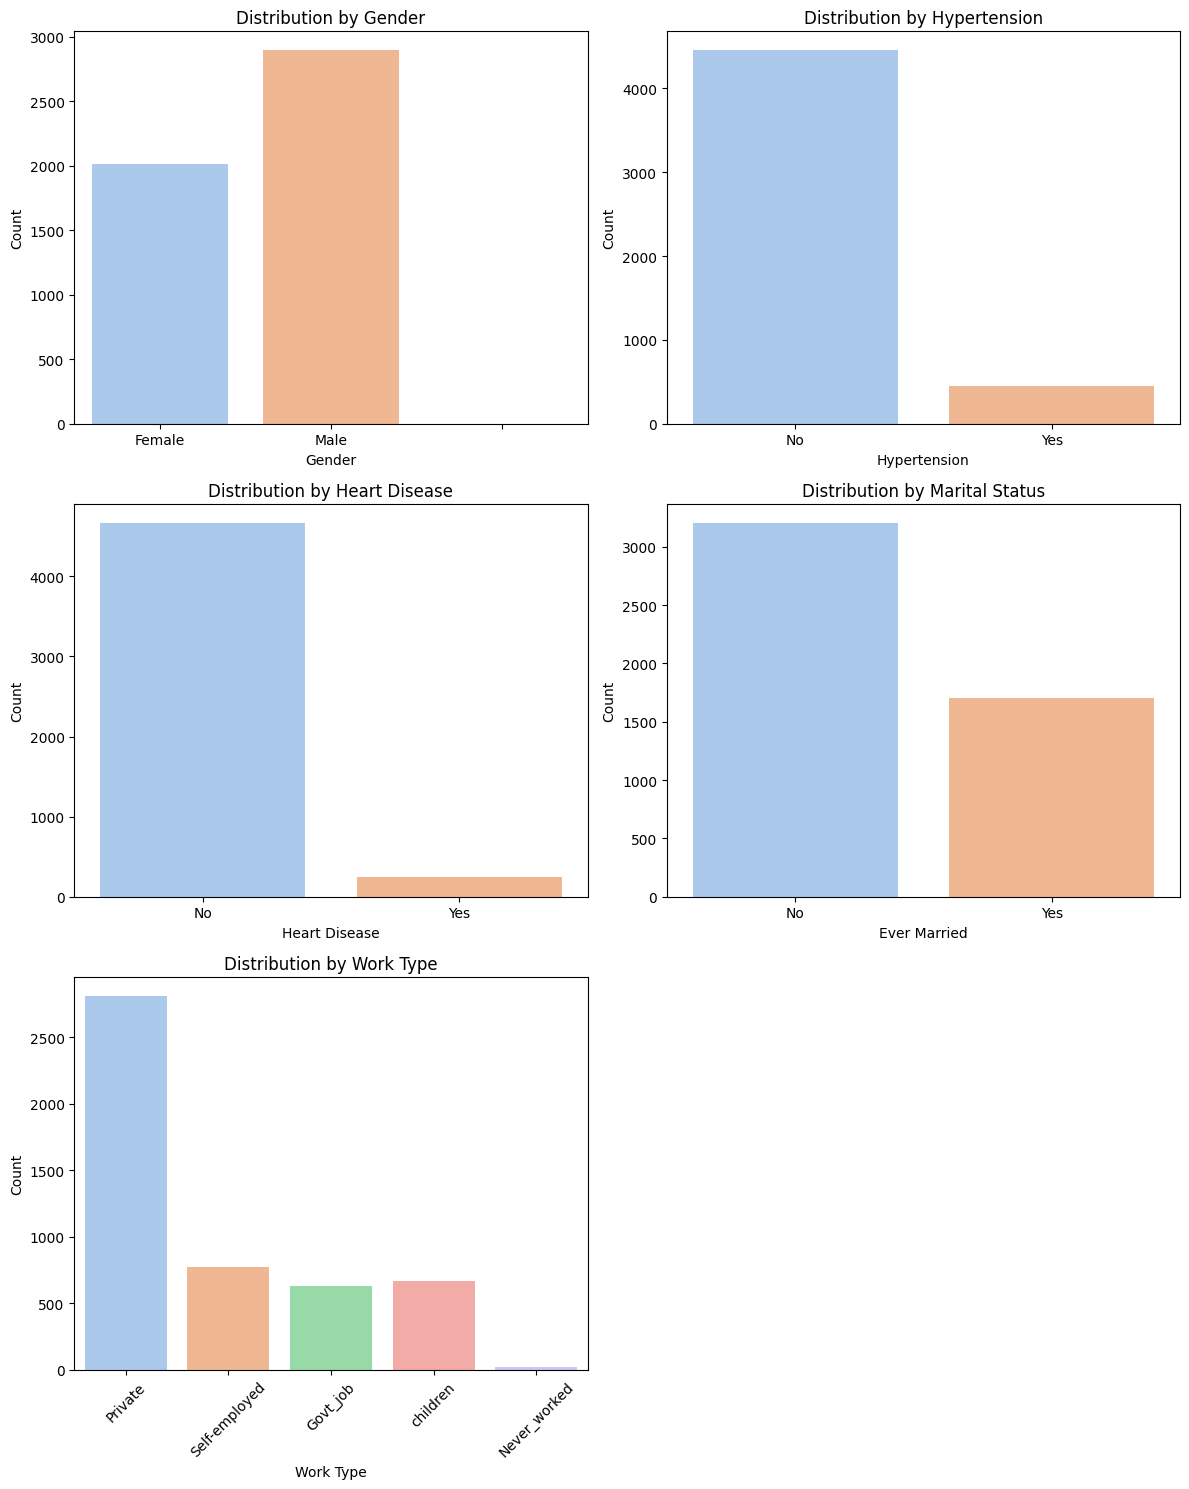

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plots for Categorical Features
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Adjusted grid to 3x2 for 5 features
fig.tight_layout(pad=3.0)

# Plot for 'gender'
sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['Female', 'Male'])

# Plot for 'hypertension'
sns.countplot(x='hypertension', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution by Hypertension')
axes[0, 1].set_xlabel('Hypertension')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot for 'heart_disease'
sns.countplot(x='heart_disease', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribution by Heart Disease')
axes[1, 0].set_xlabel('Heart Disease')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Plot for 'ever_married'
sns.countplot(x='ever_married', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribution by Marital Status')
axes[1, 1].set_xlabel('Ever Married')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No', 'Yes'])

# Plot for 'work_type'
sns.countplot(x='work_type', data=df, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Distribution by Work Type')
axes[2, 0].set_xlabel('Work Type')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)

# Turn off the last empty subplot
axes[2, 1].axis('off')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

### Boxplots

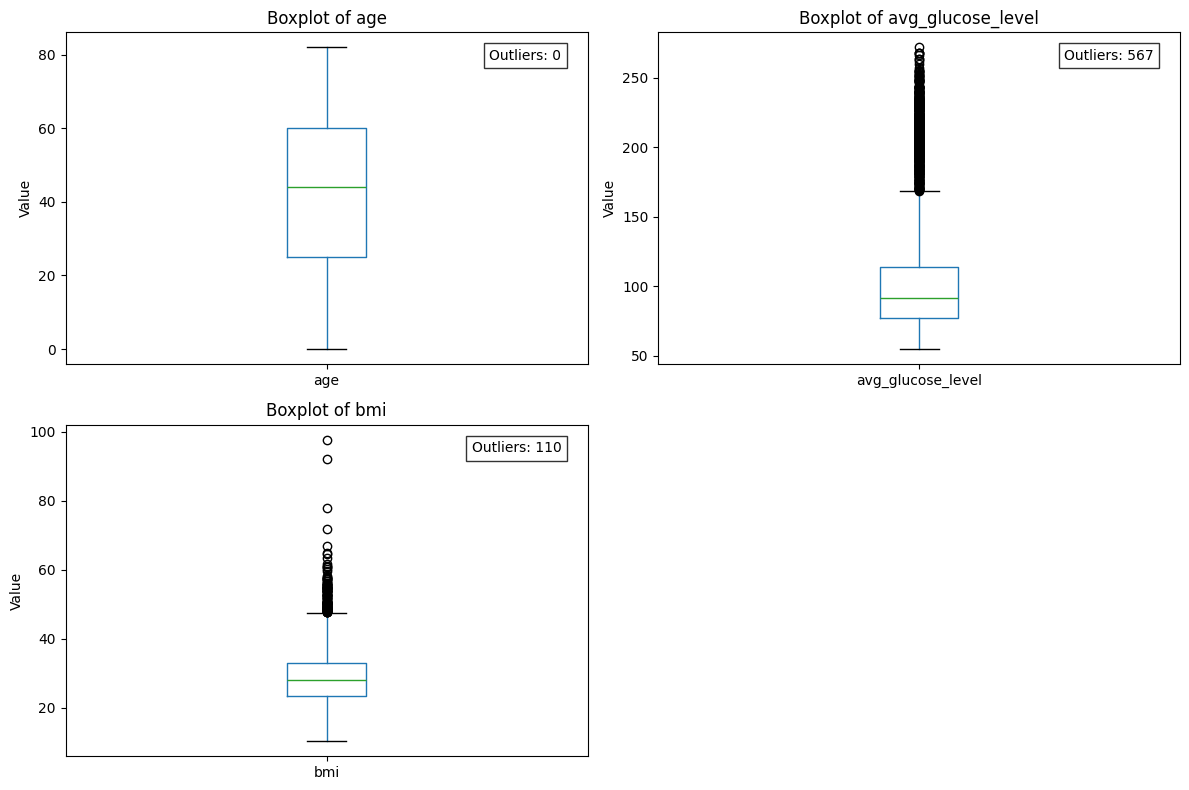

In [15]:
import matplotlib.pyplot as plt

# Define the continuous features in your stroke dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Create figure with appropriate size (adjust rows based on number of features)
plt.figure(figsize=(12, 8))

# Plot each continuous feature
for i, feature in enumerate(continuous_features, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid
    df.boxplot(column=feature, grid=False)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')

    # Calculate and display outlier count
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outlier_count = ((df[feature] < (q1 - 1.5*iqr)) | (df[feature] > (q3 + 1.5*iqr))).sum()
    plt.text(0.95, 0.95, f'Outliers: {outlier_count}',
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
if len(continuous_features) < 4:
    for j in range(len(continuous_features)+1, 5):
        plt.subplot(2, 2, j)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Remove Outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter values within the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of continuous features in your stroke dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Initialize cleaned dataframe
df_cleaned = df.copy()

# Remove outliers for each continuous feature
for feature in continuous_features:
    print(f"Before removing {feature} outliers: {len(df_cleaned)} rows")
    df_cleaned = remove_outliers_iqr(df_cleaned, feature)
    print(f"After removing {feature} outliers: {len(df_cleaned)} rows\n")

# Show the difference in dataset size
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)} ({(len(df) - len(df_cleaned))/len(df)*100:.2f}%)")

Before removing age outliers: 4909 rows
After removing age outliers: 4909 rows

Before removing avg_glucose_level outliers: 4909 rows
After removing avg_glucose_level outliers: 4342 rows

Before removing bmi outliers: 4342 rows
After removing bmi outliers: 4252 rows

Original dataset size: 4909
Cleaned dataset size: 4252
Rows removed: 657 (13.38%)


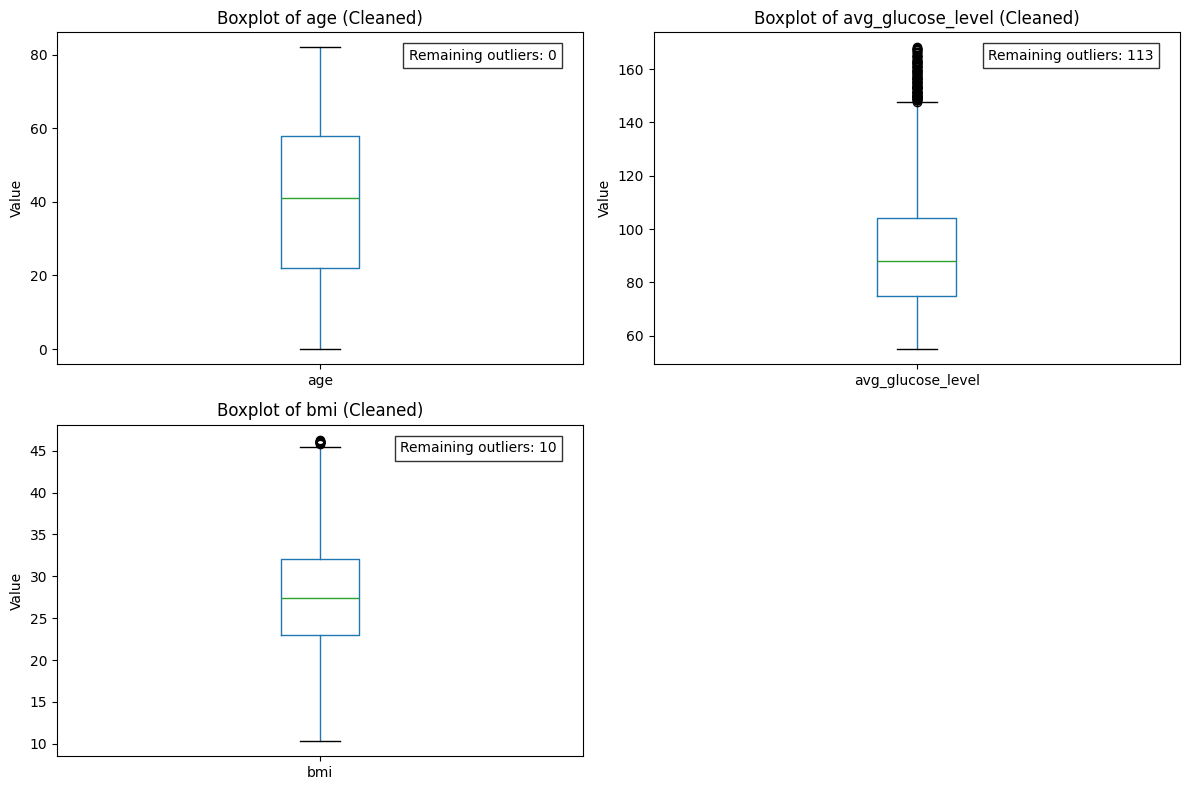

In [17]:
import matplotlib.pyplot as plt

# Define the continuous features in your cleaned dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Create figure with appropriate size (adjust rows based on number of features)
plt.figure(figsize=(12, 8))

# Plot each continuous feature
for i, feature in enumerate(continuous_features, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid (will leave one empty)
    df_cleaned.boxplot(column=feature, grid=False)
    plt.title(f'Boxplot of {feature} (Cleaned)')
    plt.ylabel('Value')

    # Calculate and display remaining outlier count (if any)
    q1 = df_cleaned[feature].quantile(0.25)
    q3 = df_cleaned[feature].quantile(0.75)
    iqr = q3 - q1
    outlier_count = ((df_cleaned[feature] < (q1 - 1.5*iqr)) |
                    (df_cleaned[feature] > (q3 + 1.5*iqr))).sum()
    plt.text(0.95, 0.95, f'Remaining outliers: {outlier_count}',
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for j in range(len(continuous_features)+1, 5):
    plt.subplot(2, 2, j)
    plt.axis('off')

plt.tight_layout()
plt.show()



## Pre-Processing the Data
The following steps will be performed :
- Splitting the data into test and train data.
- Scaling the Continuous Features

We shall now perform the train-test splitting of the dataset.

In [18]:
categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type",
                    "Residence_type", "smoking_status"]
continuous_cols = ["age", "avg_glucose_level", "bmi"]
target_col = ["stroke"]

### Train/Test Split

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Drop 'id' column as it's not useful for modeling
df = df.drop('id', axis=1)

# Encode categorical columns
# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,  # for reproducibility
    stratify=y  # maintain class distribution in splits
)

# Print shapes to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in full dataset:\n", y.value_counts(normalize=True))
print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test set:\n", y_test.value_counts(normalize=True))

Training set shape: (3681, 15)
Test set shape: (1228, 15)

Class distribution in full dataset:
 stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64

Class distribution in training set:
 stroke
0    0.957349
1    0.042651
Name: proportion, dtype: float64

Class distribution in test set:
 stroke
0    0.957655
1    0.042345
Name: proportion, dtype: float64


### Scaling the Continuous Features

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale in the training set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Scale in the test set
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4790,1,0.666567,0,1,1,0,2.662831,-0.313330,False,True,False,False,False,False,True
3592,0,-0.671714,0,0,0,1,0.043171,1.217487,False,True,False,False,False,True,False
1259,0,-0.270229,0,0,1,0,1.133712,1.013378,False,True,False,False,False,True,False
2534,0,-1.608510,0,0,0,0,0.200871,0.554133,False,False,False,True,False,False,False
3001,1,1.558755,0,0,1,1,2.133375,0.209699,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,0,-0.448667,0,0,1,0,-1.066526,-0.849116,False,False,False,False,False,False,False
706,1,-1.073198,0,0,0,0,-0.478712,0.362781,False,True,False,False,False,True,False
4828,1,-0.448667,0,0,1,0,1.058871,0.324510,False,True,False,False,False,True,False
1754,0,0.532739,0,0,1,1,2.061652,0.018347,False,False,False,False,False,False,True


# Implementations of various ML Models

In [21]:
# To suppress the unwanted warnings
import warnings
warnings.filterwarnings("ignore")

''' For each model's output, we will be implementing printing the classification report, AUC/ROC Curve in addition to the accuracy score'''
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize & train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Prediction on the test data
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Logistic Regression is : {accuracy * 100:.4f}%")

The accuracy of Logistic Regression is : 95.7655%


##CUSTOM LOGISTIC REGRESSION

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iter=1000):
        self.lr = learning_rate
        self.num_iter = num_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.num_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

# ============================
# ✅ USAGE EXAMPLE
# ============================

# Convert to numpy arrays if not already
X_train_np = X_train.to_numpy().astype(np.float32)
X_test_np = X_test.to_numpy().astype(np.float32)
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train model
log_reg_model = LogisticRegressionScratch(learning_rate=0.01, num_iter=1000)
log_reg_model.fit(X_train_np, y_train_np)

# Predict
y_pred = log_reg_model.predict(X_test_np)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n✅ Logistic Regression Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))



✅ Logistic Regression Accuracy: 95.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



We will plot the Confusion Matrix, AUC/ROC Curve & the Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



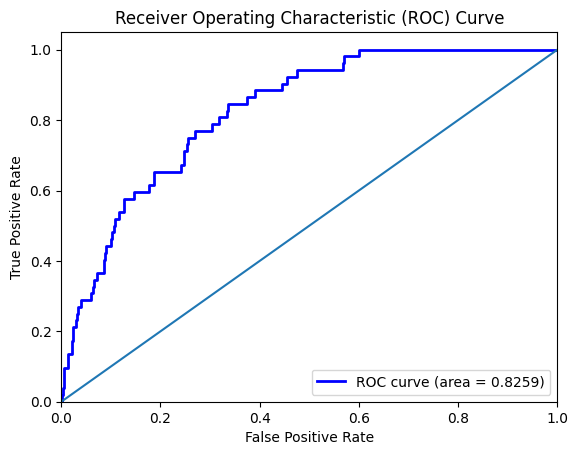

In [24]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve


# Ensure y_test is treated as a Series if it's a single-column DataFrame
if isinstance(y_test, pd.DataFrame) and y_test.shape[1] == 1:
    y_test = y_test.squeeze()


if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Gaussian Naive Bayes

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class GaussianNaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                "mean": X_c.mean(axis=0),
                "var": X_c.var(axis=0) + 1e-6,  # Add small value to avoid division by zero
                "prior": X_c.shape[0] / X.shape[0]
            }

    def _calculate_likelihood(self, mean, var, x):
        exponent = -((x - mean) ** 2) / (2 * var)
        likelihood = np.exp(exponent) / np.sqrt(2 * np.pi * var)
        return likelihood

    def _calculate_posterior(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.parameters[c]["prior"])
            class_likelihoods = self._calculate_likelihood(self.parameters[c]["mean"], self.parameters[c]["var"], x)
            total_likelihood = np.sum(np.log(class_likelihoods))
            posterior = prior + total_likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._calculate_posterior(x) for x in X])

# ============================
# ✅ USAGE EXAMPLE
# ============================

# Convert to numpy arrays
X_train_np = X_train.to_numpy().astype(np.float32)
X_test_np = X_test.to_numpy().astype(np.float32)
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train model
gnb_model = GaussianNaiveBayesScratch()
gnb_model.fit(X_train_np, y_train_np)

# Predict
y_pred = gnb_model.predict(X_test_np)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n✅ Gaussian Naive Bayes Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))



✅ Gaussian Naive Bayes Accuracy: 55.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.54      0.70      1176
           1       0.08      0.85      0.14        52

    accuracy                           0.56      1228
   macro avg       0.53      0.70      0.42      1228
weighted avg       0.95      0.56      0.68      1228



In [26]:
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
# Initialize & train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediction on Test Data
predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy of Gaussian Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Gaussian Naive Bayes model is: 39.6580%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54      1176
           1       0.07      1.00      0.12        52

    accuracy                           0.40      1228
   macro avg       0.53      0.68      0.33      1228
weighted avg       0.96      0.40      0.52      1228



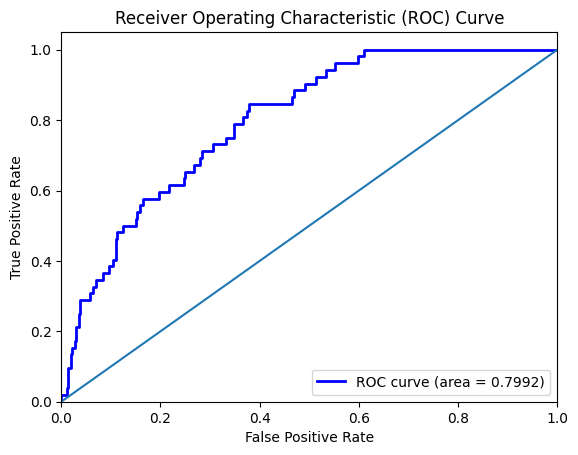

In [27]:
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Bernoulli Naive Bayes

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class BernoulliNaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.feature_count = X.shape[1]
        self.parameters = {}

        for c in self.classes:
            X_c = X[y == c]
            prob_feature_given_class = (np.sum(X_c, axis=0) + 1) / (X_c.shape[0] + 2)  # Laplace smoothing
            self.parameters[c] = {
                "feature_probs": prob_feature_given_class,
                "prior": X_c.shape[0] / X.shape[0]
            }

    def _calculate_log_posterior(self, x, class_probs):
        log_prob = np.log(class_probs["prior"])
        feature_probs = class_probs["feature_probs"]

        # Bernoulli likelihood: P(x|c) = p^x * (1 - p)^(1 - x)
        log_prob += np.sum(x * np.log(feature_probs) + (1 - x) * np.log(1 - feature_probs))
        return log_prob

    def predict(self, X):
        preds = []
        for x in X:
            posteriors = []
            for c in self.classes:
                log_post = self._calculate_log_posterior(x, self.parameters[c])
                posteriors.append(log_post)
            preds.append(self.classes[np.argmax(posteriors)])
        return np.array(preds)

# ============================
# ✅ USAGE EXAMPLE
# ============================

# Ensure binary features (0 or 1)
X_train_bin = (X_train > 0).astype(np.int32).to_numpy()
X_test_bin = (X_test > 0).astype(np.int32).to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train
bnb_model = BernoulliNaiveBayesScratch()
bnb_model.fit(X_train_bin, y_train_np)

# Predict
y_pred = bnb_model.predict(X_test_bin)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n✅ Bernoulli Naive Bayes Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))



✅ Bernoulli Naive Bayes Accuracy: 94.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1176
           1       0.20      0.12      0.15        52

    accuracy                           0.94      1228
   macro avg       0.58      0.55      0.56      1228
weighted avg       0.93      0.94      0.94      1228



In [29]:
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

# Initialize & train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Prediction on Test Data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Bernoulli Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Bernoulli Naive Bayes model is: 94.2997%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54      1176
           1       0.07      1.00      0.12        52

    accuracy                           0.40      1228
   macro avg       0.53      0.68      0.33      1228
weighted avg       0.96      0.40      0.52      1228



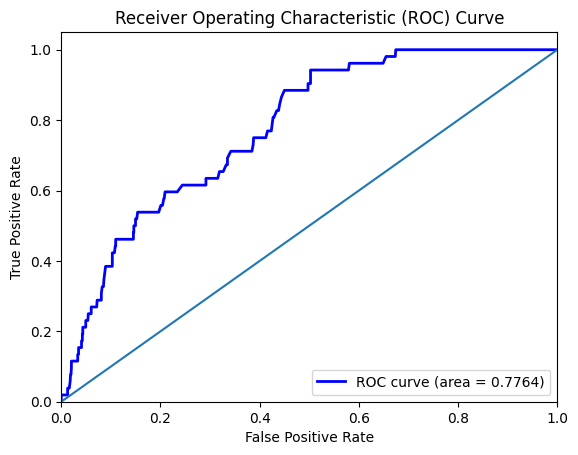

In [30]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score  # You need this for accuracy calculation

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(SVC(probability=True), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Output best parameters and cross-validation accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.4f}%")

# Use the best estimator for final training
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of SVM with optimal hyperparameters is: {accuracy * 100:.4f}%")


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 95.7620%
The accuracy of SVM with optimal hyperparameters is: 95.7655%


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



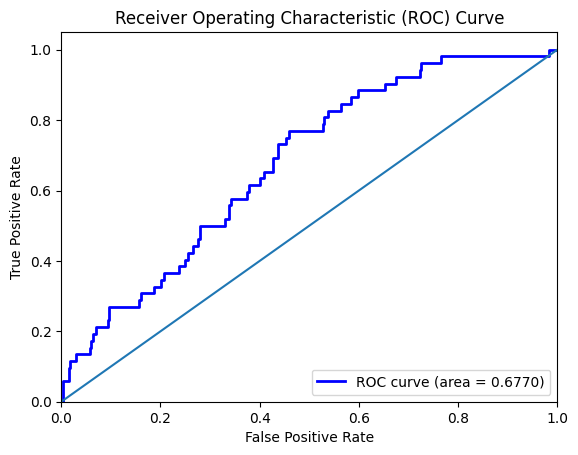

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Decision Tree

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# -----------------------
# Helper functions
# -----------------------

def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    prob_sq = (counts / len(y)) ** 2
    return 1 - np.sum(prob_sq)

def best_split(X, y):
    m, n = X.shape
    best_feature, best_threshold = None, None
    best_gain = 0
    current_impurity = gini_impurity(y)

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            left = y[X[:, feature] <= t]
            right = y[X[:, feature] > t]
            if len(left) == 0 or len(right) == 0:
                continue

            p_left = len(left) / len(y)
            p_right = 1 - p_left
            gain = current_impurity - (p_left * gini_impurity(left) + p_right * gini_impurity(right))

            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = t

    return best_feature, best_threshold

# -----------------------
# Tree Node
# -----------------------

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # if leaf node

    def is_leaf(self):
        return self.value is not None

# -----------------------
# Decision Tree Classifier
# -----------------------

class DecisionTreeScratch:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _build(self, X, y, depth):
        num_samples, num_features = X.shape

        # Stopping conditions
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(np.unique(y)) == 1:
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        feature, threshold = best_split(X, y)
        if feature is None:
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold

        left = self._build(X[left_idx], y[left_idx], depth + 1)
        right = self._build(X[right_idx], y[right_idx], depth + 1)
        return Node(feature=feature, threshold=threshold, left=left, right=right)

    def fit(self, X, y):
        self.root = self._build(X, y, 0)

    def _predict(self, x, node):
        if node.is_leaf():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict(x, node.left)
        else:
            return self._predict(x, node.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])

# -----------------------
# ✅ USAGE
# -----------------------

# Prepare data
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Train
tree = DecisionTreeScratch(max_depth=5)
tree.fit(X_train_np, y_train_np)

# Predict
y_pred = tree.predict(X_test_np)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n✅ Decision Tree Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))



✅ Decision Tree Accuracy: 95.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.20      0.02      0.04        52

    accuracy                           0.96      1228
   macro avg       0.58      0.51      0.51      1228
weighted avg       0.93      0.96      0.94      1228



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],        # Split criteria
    'max_depth': [None, 10, 20, 30, 40, 50], # Depth of the tree
    'min_samples_split': [2, 10, 20],        # Min samples to split a node
    'min_samples_leaf': [1, 5, 10]           # Min samples at a leaf node
}

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Train the classifier on the training set
best_dt_classifier.fit(X_train, y_train)

# Predictiction on the test set
y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Decision Tree: {accuracy * 100:.4f}%")

The accuracy of Decision Tree: 95.1954%



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1176
           1       0.29      0.10      0.14        52

    accuracy                           0.95      1228
   macro avg       0.63      0.54      0.56      1228
weighted avg       0.93      0.95      0.94      1228



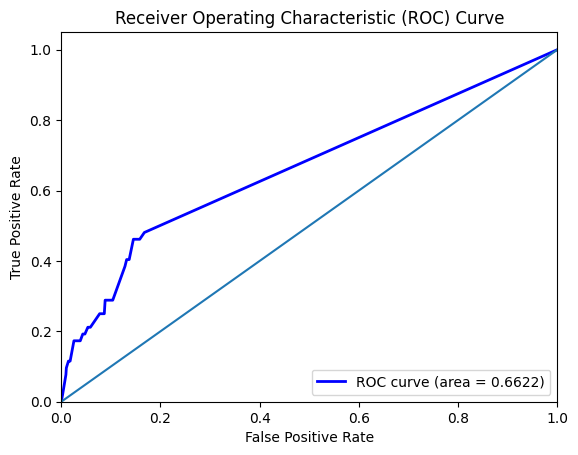

In [35]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_dt_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## K-Nearest Neighbors (KNN)

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

# -----------------------
# Helper functions
# -----------------------

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label among the neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# -----------------------
# ✅ USAGE
# -----------------------

# Prepare data
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Train KNN model
knn = KNNClassifier(k=3)
knn.fit(X_train_np, y_train_np)

# Predict
y_pred = knn.predict(X_test_np)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\n✅ KNN Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))



✅ KNN Accuracy: 95.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.95      0.93      1228



In [37]:
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Implementing the KNN model

# Consider n_neighbours = 5 initially.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the model on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of KNN: {accuracy * 100:.4f}%")

The accuracy of KNN: 95.5212%



Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



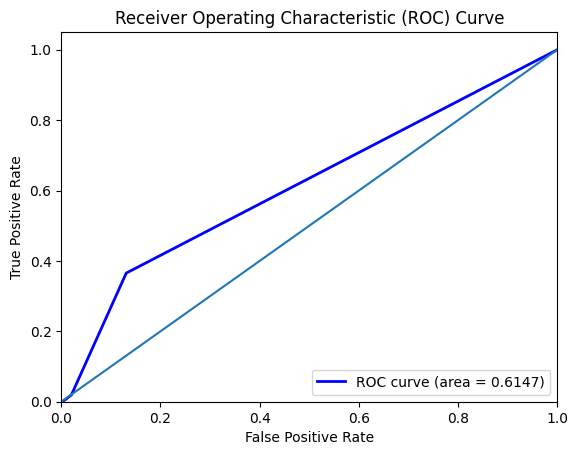

In [38]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Multi-Layer Perceptron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

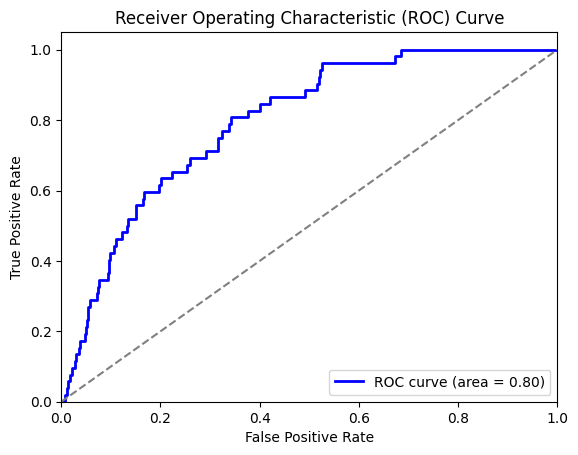


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



In [39]:
# Install torch (for Colab)
!pip install torch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Define the PyTorch model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # The input size of the first layer is changed to 15 to match the number of features
        self.fc1 = nn.Linear(15, 16)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(16, 8)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(8, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x  # logits

# Initialize model, loss, optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Convert data to tensors (You must define X_train, y_train before this)
X_train_tensor = torch.tensor(X_train.astype(np.float32).values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.astype(np.float32).values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        all_preds.append(probs.numpy())
        all_labels.append(labels.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

# Post-processing for metrics
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# ROC and AUC
fpr, tpr, _ = roc_curve(all_labels, all_preds[:, 1])
roc_auc = auc(fpr, tpr)

# ROC Curve Plot
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, np.argmax(all_preds, axis=1)))